In [4]:
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [5]:
simulator = QasmSimulator()

circuit = QuantumCircuit(2, 2)

circuit.h(0)

circuit.cx(0, 1)

circuit.measure([0, 1], [0, 1])

# compile circuit down to low-level QASM instructions
# supported by the backend
compiled_circuit = transpile(circuit, simulator)

# execute job on qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

result = job.result()

counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:", counts)

circuit.draw()


Total count for 00 and 11 are: {'00': 504, '11': 496}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

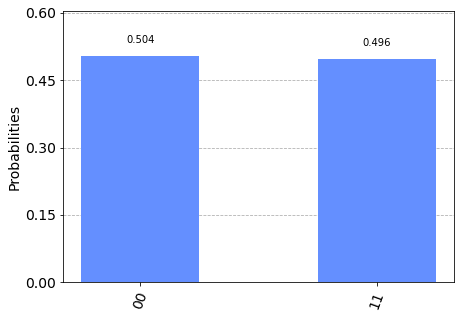

In [6]:
plot_histogram(counts)